In [235]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'  

import warnings
warnings.filterwarnings('ignore')

### 1. 데이터 수집 및 전처리

In [6]:
point = pd.read_excel('final_assignment_point.xlsx') # 날짜별 학회원 상/벌점
point.head(3) 

,id,class_id,bonus,minus,point_date
0,42d73f12b66c,1,0,5,2024-08-30
1,aabee5112759,1,0,5,2024-08-30
2,9dc616405c62,1,0,5,2024-08-30


In [57]:
point_score = point.drop('point_date', axis=1)
point_summary = point_score.groupby(['id','class_id'])[['bonus','minus']].sum()
point_summary = point_summary.reset_index()
point_summary['total_point'] = point_summary['bonus'] + point_summary['minus']*(-1)
point_summary = point_summary.drop(['bonus','minus'], axis=1)

In [59]:
assignment = pd.read_excel('final_assignment_assignment.xlsx') # 2-9주차 과제 제출 
assignment.head(3)

,id,class_id,week2,week3,week4,week5,week6,week7,week8,week9
0,98bde39600d6,4,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0
1,4433cfd368ac,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,32ded238f401,6,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
assignment.isna().sum()

id           0
class_id     0
week2       38
week3        4
week4        7
week5        7
week6       11
week7       81
week8       10
week9       12
dtype: int64

In [71]:
assignment = assignment.fillna('0')
assignment_score = assignment.iloc[:,2:].astype('float')
assignment['submission_score'] = assignment_score.sum(axis=1)
assignment['submission_rate'] = assignment['total_score']/16

In [72]:
assignment_summary = assignment[['id', 'class_id','submission_score','submission_rate']]
assignment_summary.describe()

,class_id,submission_score,submission_rate
count,966.000000,966.000000,966.000000
mean,5.310559,15.571234,0.471856
std,3.512352,12.415030,0.376213
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,5.000000,16.500000,0.500000
75%,7.000000,28.875000,0.875000
max,13.000000,33.000000,1.000000


In [80]:
group_activity = pd.read_excel('final_assignment_group_activity.xlsx') # 스터디 참여 
group_activity.head(3)

,id,class_id,group_master,on_offline,group_leave
0,66bdd0852bcb,1,True,온라인,False
1,014efac64f8c,8,False,오프라인,True
2,bea1ad1f0e12,4,False,오프라인,False


In [81]:
group_activity['group_study'] = 0 # 스터디 참여 조원, 이탈 
group_activity.loc[(group_activity['group_master']==0) & (group_activity['group_leave']==0), 'group_study'] = 1 # 스터디 참여 조원, 미이탈
group_activity.loc[(group_activity['group_master']==1) & (group_activity['group_leave']==0), 'group_study'] = 2 # 스터디 참여 조장, 미이탈

In [82]:
group_activity['group_study'].value_counts()

group_study
1    185
2     55
0     39
Name: count, dtype: int64

In [83]:
group_activity[['on_offline','group_study']].value_counts()

on_offline  group_study
오프라인        1              158
            2               48
            0               30
온라인         1               27
            0                9
            2                7
Name: count, dtype: int64

In [115]:
group_summary = group_activity.drop(['group_master','on_offline','group_leave'], axis=1)

In [116]:
merged_summary = pd.merge(point_summary, assignment_summary, on=['id','class_id'], how='left')
merged_summary = pd.merge(merged_summary, group_summary, on=['id','class_id'], how='left')

In [117]:
merged_summary = merged_summary.fillna(0)
merged_summary = merged_summary[['id', 'class_id','submission_score', 'submission_rate', 'group_study','total_point']]
merged_summary

,id,class_id,submission_score,submission_rate,group_study,total_point
0,640000000,1,8.250,0.250,0.0,-44
1,002e60490b77,6,4.125,0.125,0.0,-31
2,007b7715a81f,1,12.375,0.375,0.0,-41
3,0085542278b4,7,33.000,1.000,0.0,-2
4,00bcc509d9b0,5,8.250,0.250,0.0,-38
...,...,...,...,...,...,...
961,feaae2e33417,4,8.250,0.250,0.0,-39
962,fee7f523c37d,1,28.875,0.875,1.0,-3
963,ff9ee45023dd,13,0.000,0.000,0.0,-75
964,ffa303255931,12,33.000,1.000,0.0,6


### 2. 탐색적 데이터 분석 및 시각화

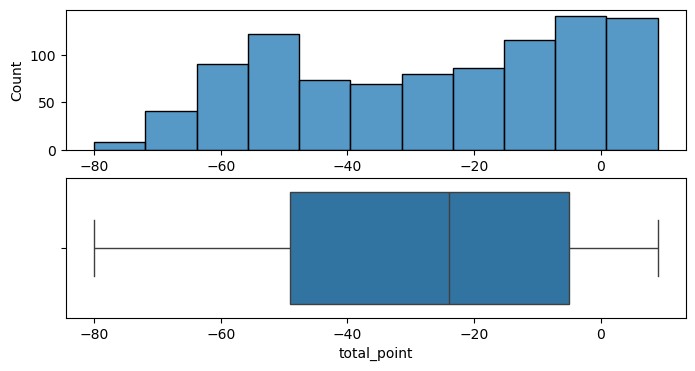

count    966.000000
mean     -26.781573
std       23.402779
min      -80.000000
25%      -49.000000
50%      -24.000000
75%       -5.000000
max        9.000000
Name: total_point, dtype: float64

In [118]:
plt.figure(figsize=(8,4))

plt.subplot(2,1,1)
sns.histplot(data = merged_summary, x = 'total_point')

plt.subplot(2,1,2)
sns.boxplot(data = merged_summary, x = 'total_point')

plt.show()
merged_summary['total_point'].describe()

In [218]:
merged_summary['category'] = pd.cut(merged_summary['total_point'], bins=[-80, -49, -20, -5, 9], labels=[1,2,3,4], right=True)
merged_summary

,id,class_id,submission_score,submission_rate,group_study,total_point,category
0,640000000,1,8.250,0.250,0.0,-44,2
1,002e60490b77,6,4.125,0.125,0.0,-31,2
2,007b7715a81f,1,12.375,0.375,0.0,-41,2
3,0085542278b4,7,33.000,1.000,0.0,-2,4
4,00bcc509d9b0,5,8.250,0.250,0.0,-38,2
...,...,...,...,...,...,...,...
961,feaae2e33417,4,8.250,0.250,0.0,-39,2
962,fee7f523c37d,1,28.875,0.875,1.0,-3,4
963,ff9ee45023dd,13,0.000,0.000,0.0,-75,1
964,ffa303255931,12,33.000,1.000,0.0,6,4


In [225]:
pivot_summary = merged_summary.pivot_table(index='class_id', columns='category', values='id', aggfunc='count')
total_row = pivot_summary.sum(numeric_only=True).to_frame().T
total_row.index = ['Total']  

pivot_summary = pd.concat([pivot_summary, total_row])
pivot_summary = pivot_summary.reset_index()

In [227]:
class_list = pd.read_excel('final_assignment_class.xlsx')

pivot_summary = pivot_summary.merge(class_list, left_on='index', right_on='class_id', how='left')
pivot_summary = pivot_summary[['class_id','class_name', 1, 2, 3, 4]]
pivot_summary['total'] = pivot_summary[1] + pivot_summary[2] + pivot_summary[3] + pivot_summary[4]
pivot_summary

,class_id,class_name,1,2,3,4,total
0,1.0,Python 문법 기초반,36,46,21,26,129
1,2.0,SQL 문법 기초반,30,55,42,31,158
2,4.0,데이터 분석 입문반 (머신러닝),46,64,37,35,182
3,5.0,데이터 분석 입문반 (통계),28,30,22,32,112
4,6.0,데이터 분석 전처리반 (판다스),22,19,19,37,97
5,7.0,데이터 분석 전처리 적용반,24,15,16,13,68
6,8.0,데이터 분석 모델링반 (ML1),28,21,10,21,80
7,11.0,데이터 분석 모델링반 (ML2),6,7,10,10,33
8,12.0,SQL 문법 기초 연습반,20,11,6,12,49
9,13.0,데이터 분석 전처리 실전반,14,14,18,11,57


In [228]:
pivot_summary_ratio = pivot_summary.copy()  

pivot_summary_ratio['1_ratio'] = (pivot_summary_ratio[1] / pivot_summary_ratio['total']) 
pivot_summary_ratio['2_ratio'] = (pivot_summary_ratio[2] / pivot_summary_ratio['total']) 
pivot_summary_ratio['3_ratio'] = (pivot_summary_ratio[3] / pivot_summary_ratio['total']) 
pivot_summary_ratio['4_ratio'] = (pivot_summary_ratio[4] / pivot_summary_ratio['total']) 

pivot_summary_ratio = pivot_summary_ratio[['class_id', 'class_name', '1_ratio', '2_ratio', '3_ratio', '4_ratio']]
pivot_summary_ratio

,class_id,class_name,1_ratio,2_ratio,3_ratio,4_ratio
0,1.0,Python 문법 기초반,0.279070,0.356589,0.162791,0.201550
1,2.0,SQL 문법 기초반,0.189873,0.348101,0.265823,0.196203
2,4.0,데이터 분석 입문반 (머신러닝),0.252747,0.351648,0.203297,0.192308
3,5.0,데이터 분석 입문반 (통계),0.250000,0.267857,0.196429,0.285714
4,6.0,데이터 분석 전처리반 (판다스),0.226804,0.195876,0.195876,0.381443
5,7.0,데이터 분석 전처리 적용반,0.352941,0.220588,0.235294,0.191176
6,8.0,데이터 분석 모델링반 (ML1),0.350000,0.262500,0.125000,0.262500
7,11.0,데이터 분석 모델링반 (ML2),0.181818,0.212121,0.303030,0.303030
8,12.0,SQL 문법 기초 연습반,0.408163,0.224490,0.122449,0.244898
9,13.0,데이터 분석 전처리 실전반,0.245614,0.245614,0.315789,0.192982


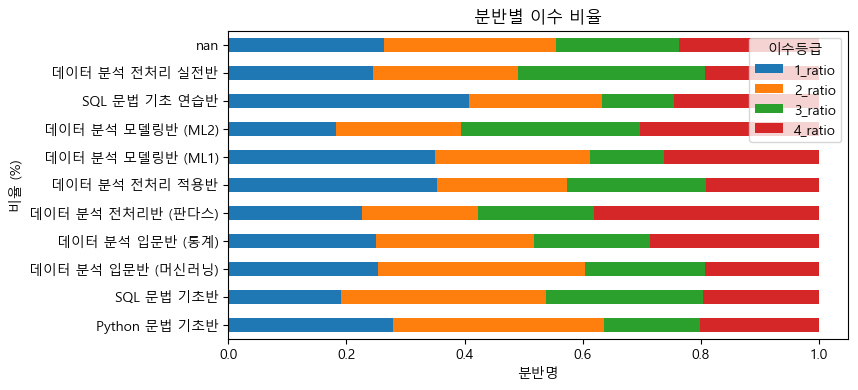

In [267]:
df_bar = pivot_summary_ratio[['class_name', '1_ratio', '2_ratio', '3_ratio', '4_ratio']].set_index('class_name')
df_bar.plot(kind='barh', stacked=True, figsize=(8, 4))
plt.title('분반별 이수 비율')
plt.xlabel('분반명')
plt.ylabel('비율 (%)')
plt.legend(title='이수등급', loc='upper right')
plt.show()

In [258]:
merged_summary

,id,class_id,submission_score,submission_rate,group_study,total_point,category
0,640000000,1,8.250,0.250,0.0,-44,2
1,002e60490b77,6,4.125,0.125,0.0,-31,2
2,007b7715a81f,1,12.375,0.375,0.0,-41,2
3,0085542278b4,7,33.000,1.000,0.0,-2,4
4,00bcc509d9b0,5,8.250,0.250,0.0,-38,2
...,...,...,...,...,...,...,...
961,feaae2e33417,4,8.250,0.250,0.0,-39,2
962,fee7f523c37d,1,28.875,0.875,1.0,-3,4
963,ff9ee45023dd,13,0.000,0.000,0.0,-75,1
964,ffa303255931,12,33.000,1.000,0.0,6,4


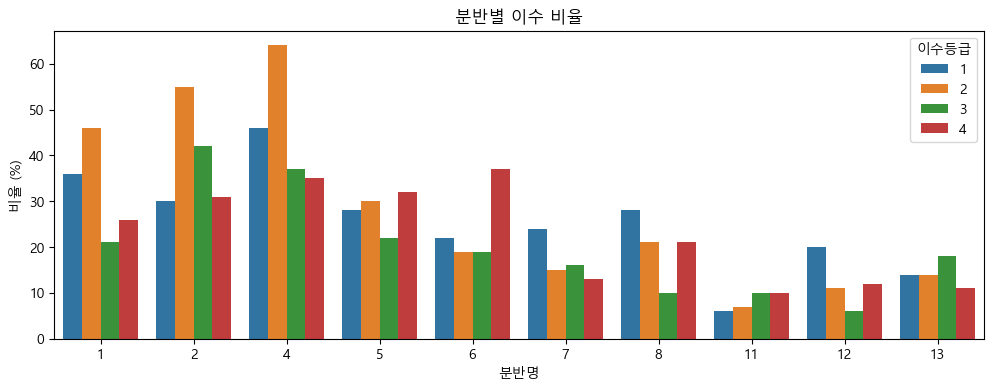

In [273]:
plt.figure(figsize=(12,4))
sns.countplot(data=merged_summary, x='class_id', hue='category')
plt.title('분반별 이수 비율')
plt.xlabel('분반명')
plt.ylabel('비율 (%)')
plt.legend(title='이수등급', loc='upper right')
plt.show()

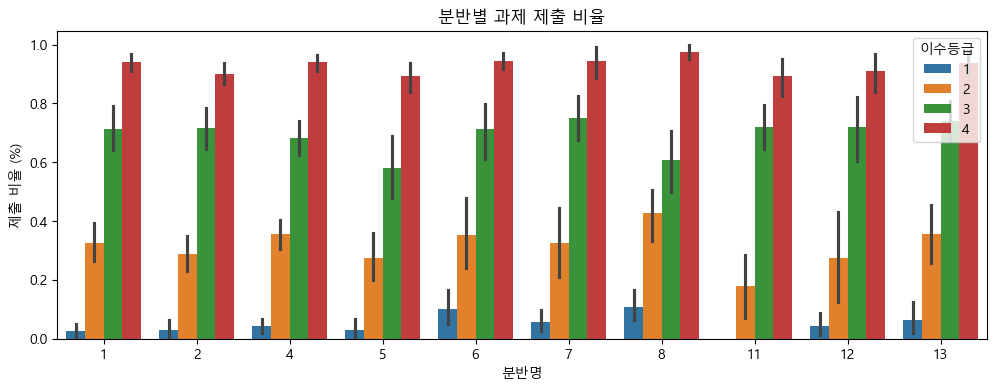

In [279]:
plt.figure(figsize=(12,4))
sns.barplot(data=merged_summary, x='class_id', y='submission_rate', hue='category')
plt.title('분반별 과제 제출 비율')
plt.xlabel('분반명')
plt.ylabel('제출 비율 (%)')
plt.legend(title='이수등급', loc='upper right')
plt.show()

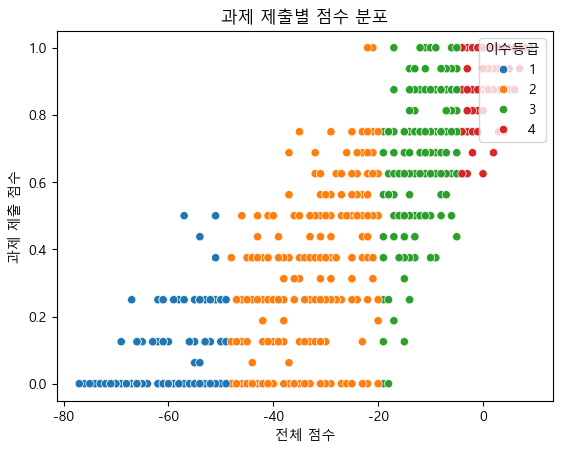

In [294]:
sns.scatterplot(data=merged_summary, x='total_point', y='submission_rate', hue='category')
plt.title('과제 제출별 점수 분포')
plt.xlabel('전체 점수')
plt.ylabel('과제 제출 점수')
plt.legend(title='이수등급', loc='upper right')
plt.show()

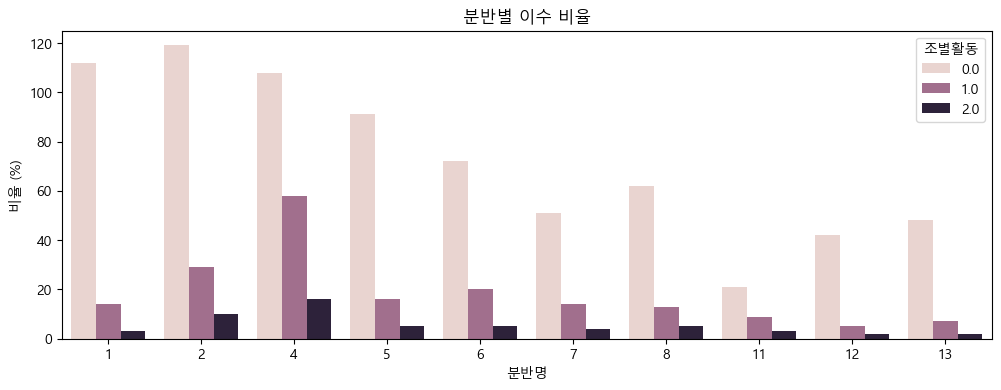

In [354]:
plt.figure(figsize=(12,4))
sns.countplot(data=merged_summary, x='class_id', hue='group_study')
plt.title('분반별 이수 비율')
plt.xlabel('분반명')
plt.ylabel('비율 (%)')
plt.legend(title='조별활동', loc='upper right')
plt.show()

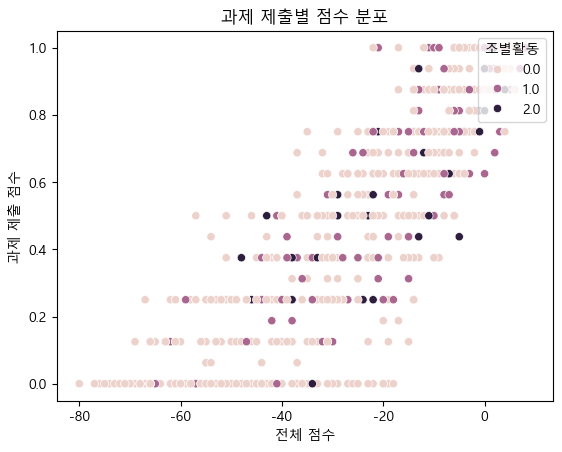

In [298]:
sns.scatterplot(data=merged_summary, x='total_point', y='submission_rate', hue='group_study')
plt.title('과제 제출별 점수 분포')
plt.xlabel('전체 점수')
plt.ylabel('과제 제출 점수')
plt.legend(title='조별활동', loc='upper right')
plt.show()

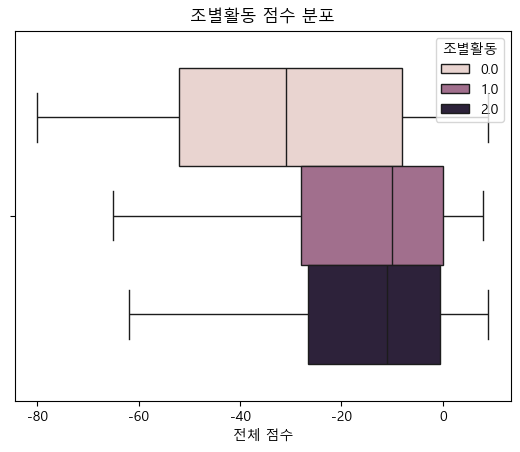

In [304]:
sns.boxplot(data=merged_summary, x='total_point', hue='group_study')
plt.title('조별활동 점수 분포')
plt.xlabel('전체 점수')
plt.legend(title='조별활동', loc='upper right')
plt.show()

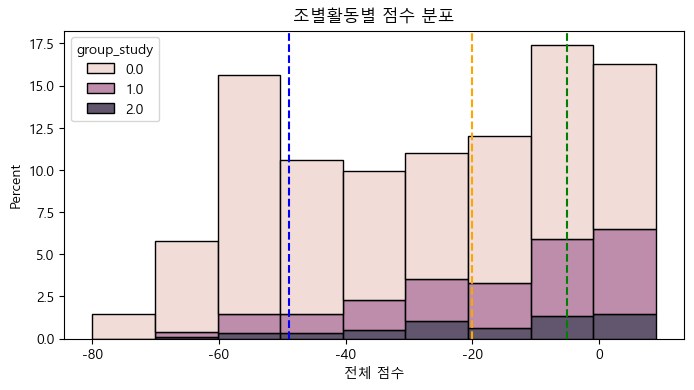

In [345]:
plt.figure(figsize=(8,4))
sns.histplot(data=merged_summary, x='total_point', hue='group_study', multiple='stack', stat='percent', bins=9)
plt.title('조별활동별 점수 분포')
plt.xlabel('전체 점수')
plt.axvline(x=-49, color='blue', linestyle='--', linewidth=1.5)
plt.axvline(x=-20, color='orange', linestyle='--', linewidth=1.5)
plt.axvline(x=-5, color='green', linestyle='--', linewidth=1.5)
plt.show()

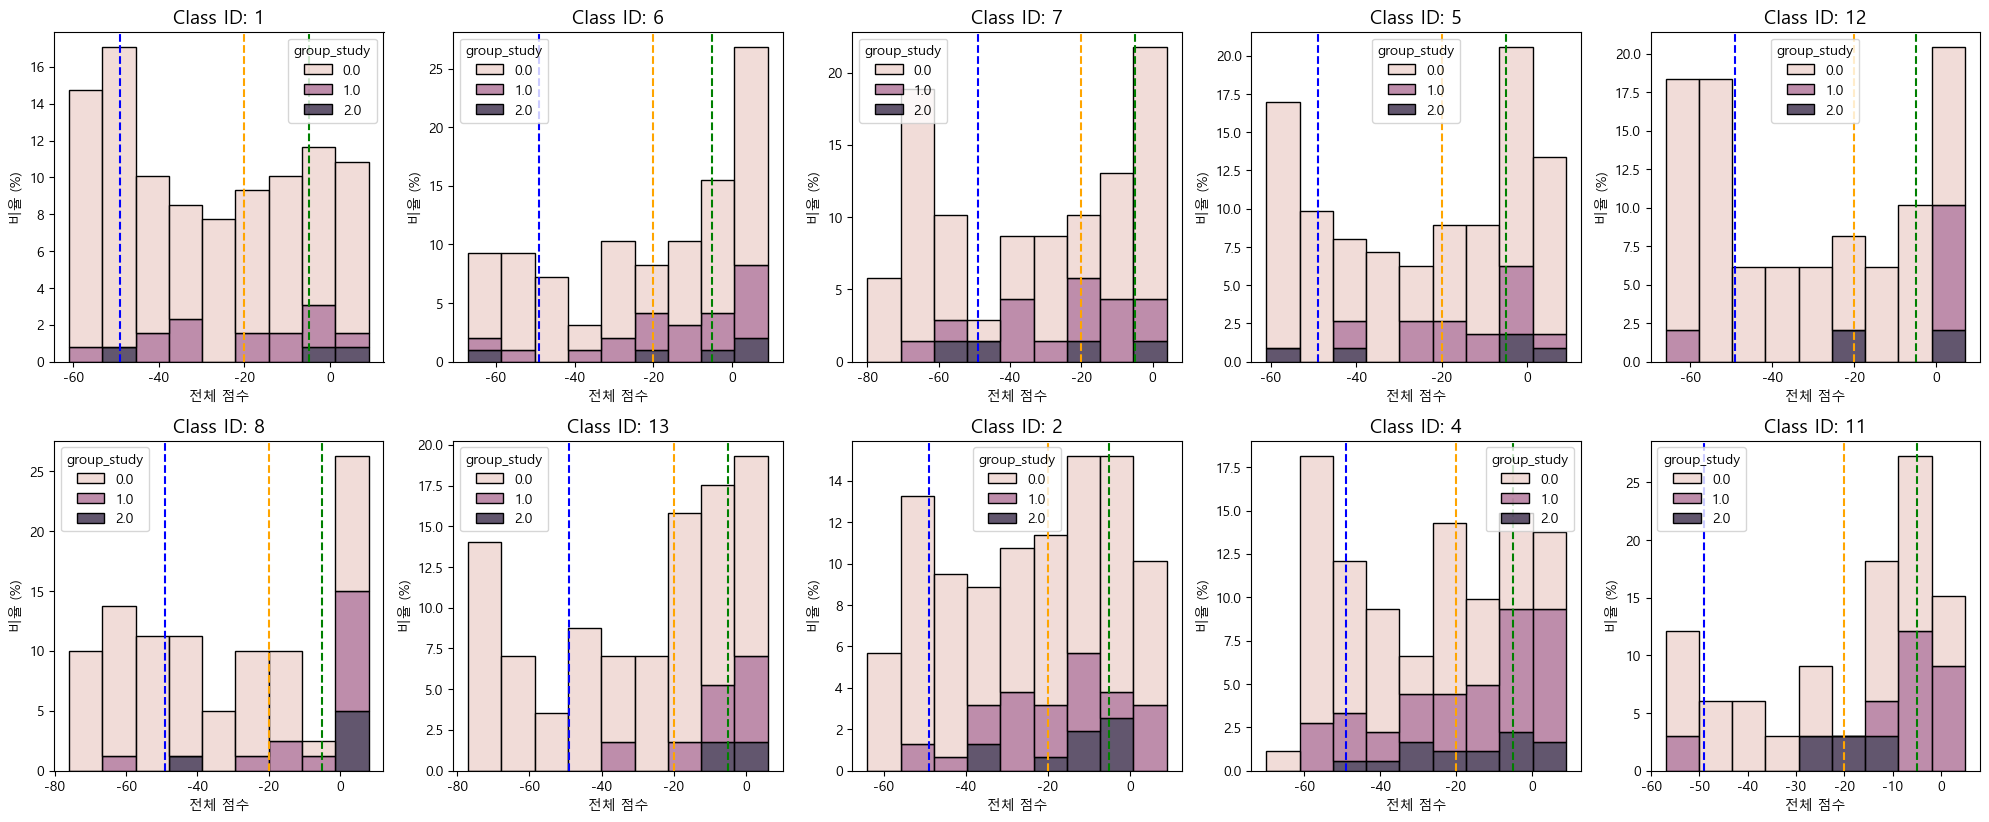

In [ ]:
class_ids = merged_summary['class_id'].unique()

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))
axes = axes.flatten()

for idx, class_id in enumerate(class_ids):
    ax = axes[idx]
    df_subset = merged_summary[merged_summary['class_id'] == class_id]

    if not df_subset.empty:
        sns.histplot(data=df_subset, x='total_point', hue='group_study', multiple='stack', stat='percent', bins=9, ax=ax)
        ax.axvline(x=-49, color='blue', linestyle='--', linewidth=1.5)
        ax.axvline(x=-20, color='orange', linestyle='--', linewidth=1.5)
        ax.axvline(x=-5, color='green', linestyle='--', linewidth=1.5)
        ax.set_title(f'Class ID: {class_id}', fontsize=14)
        ax.set_xlabel('전체 점수')
        ax.set_ylabel('비율 (%)')

for idx in range(len(class_ids), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


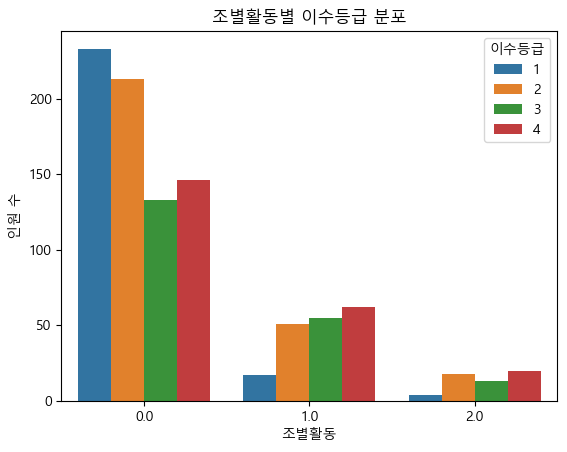

In [355]:
sns.countplot(data=merged_summary, x='group_study', hue='category')
plt.title('조별활동별 이수등급 분포')
plt.xlabel('조별활동')
plt.ylabel('인원 수')
plt.legend(title='이수등급', loc='upper right')
plt.show()

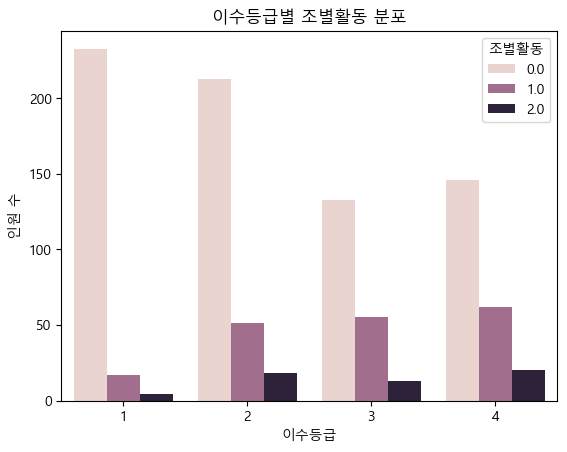

In [356]:
sns.countplot(data=merged_summary, x='category', hue='group_study')
plt.title('이수등급별 조별활동 분포')
plt.xlabel('이수등급')
plt.ylabel('인원 수')
plt.legend(title='조별활동', loc='upper right')
plt.show()